In [26]:
%matplotlib inline

# Lotka-Volterra model implemented in FABM

The equations read:

$$
\begin{aligned}
\dot{x} = \alpha x - \beta x y \\
\dot{y} = \delta x y - \gamma y 
\end{aligned}
$$

where $x$ represents prey and $y$ represents predator. $ \alpha, \beta, \delta$ and $\gamma$ are model parameters defining the interactions between the spicies.

For further information [see](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations). 

The implementation of the Lotka-Volterra equations in [FABM](www.fabm.net) was done by Fenjuan Hu when she started her PhD to get familiar with the FABM framework.

Import standard _python_ packages

In [27]:
import numpy
import scipy.integrate

Import __pyfabm__ - the python module that contains the Fortran based [FABM](www.fabm.net)

In [28]:
import pyfabm
#pyfabm.get_version()

## Configuration
The model configuration is done via the YAML formatted file.

In [29]:
yaml_file = '/home/kb/FABM/fabm/testcases/fabm-au-prey_predator.yaml'
model = pyfabm.Model(yaml_file)
model.findDependency('bottom_depth').value = 1.
model.checkReady(stop=True)
y0 = model.state

## Model increment

In [30]:
def dy(y,t0):
    model.state[:] = y
    return model.getRates()

## Time axis and model integration

In [31]:
t = numpy.linspace(0,200.,100)
y = scipy.integrate.odeint(dy,model.state,10000*t)

## Plot the results

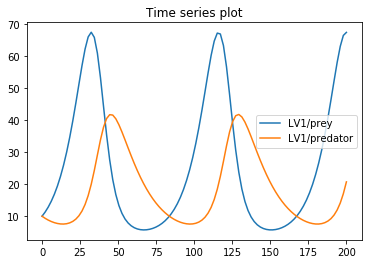

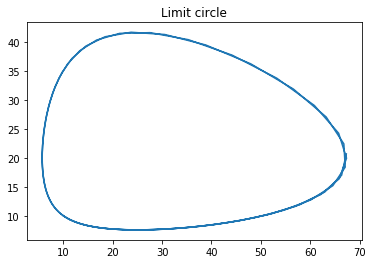

In [32]:
import pylab
pylab.plot(t,y)
pylab.title('Time series plot')
pylab.legend([variable.path for variable in model.state_variables])
pylab.show()

pylab.plot(y[:,0],y[:,1])
pylab.title('Limit circle')
pylab.show()

The Lotka-Volterra equations in a different context:

https://www.youtube.com/watch?v=MjPFHWul2J0&t=6m1s